In [69]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
from utils import *

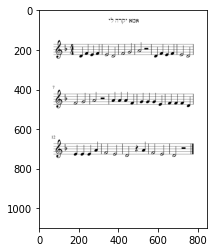

In [70]:
img = cv2.imread(r"C:\Users\nguye\Downloads\score_0.png", cv2.IMREAD_GRAYSCALE)
# retval, img = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)
# image = cv2.imread(r"C:\Users\nguye\Downloads\Kmo04.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap = 'gray')

[172, 185, 198, 212, 225, 423, 436, 449, 463, 476, 674, 687, 700, 713, 727]
There are 15 lines


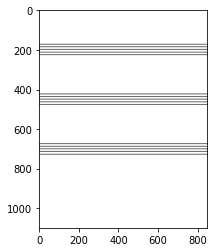

In [71]:
HEIGHT, WIDTH = img.shape

rowsWithLine = blackHorizontalLinesRowInd(img, HEIGHT, WIDTH, 0.4)
trimmedRowsWithLine = trimRowsWithLine(rowsWithLine, minGap = 5)
plt.imshow(drawHorizontalLines(trimmedRowsWithLine, HEIGHT, WIDTH), cmap = 'gray')

print(trimmedRowsWithLine)
print('There are', len(trimmedRowsWithLine), 'lines')

In [72]:
clusterLst = linesClustering(trimmedRowsWithLine, minGap = 50)
avgLinesGap = averageLinesGap(clusterLst)

print('There are', len(clusterLst), 'line clusters')
print(clusterLst)
print('Average line gap:', avgLinesGap)

There are 3 line clusters
[[172, 185, 198, 212, 225], [423, 436, 449, 463, 476], [674, 687, 700, 713, 727]]
Average line gap: 13.25


In [73]:
columnsWithLine = blackVerticalLinesColumnInd(img, HEIGHT, WIDTH, clusterLst, threshold = 0.99)
columnsWithLine

{(172, 225): [317, 399, 481, 564, 693],
 (423, 476): [255, 351, 634],
 (674, 727): [313, 419, 550, 656, 764, 771, 772, 773, 774, 775]}

In [74]:
trimmedColumnsWithLine = trimColumnsWithLine(columnsWithLine, minGap = 100)
print(trimmedColumnsWithLine)

{(172, 225): [317, 693], (423, 476): [255, 634], (674, 727): [313, 419, 550, 656, 764]}


Text(0.5, 1.0, 'Resize')

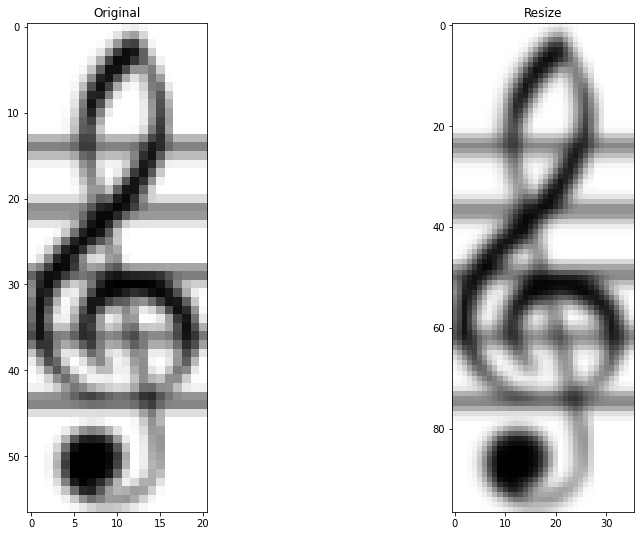

In [75]:
CLEF_W_H_RATIO = 3/8 #W/H
CLEF_H_LINE_GAP_RATIO = 7.35

CLEF_H = int(avgLinesGap * CLEF_H_LINE_GAP_RATIO)
CLEF_W = int(avgLinesGap * CLEF_H_LINE_GAP_RATIO * CLEF_W_H_RATIO)

clefTemplate = cv2.imread(r"C:\Users\nguye\Downloads\clef.png", cv2.IMREAD_GRAYSCALE)

clefTemplateResize = cv2.resize(clefTemplate, (CLEF_W, CLEF_H))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(clefTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(clefTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([79, 79, 79, 79, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80,
       81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81,
       81, 81, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82,
       82, 82, 82, 82, 82, 82, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83,
       83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 84, 84, 84, 84, 84, 84,
       84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 85, 85, 85, 85, 85],
      dtype=int64), array([400, 401, 651, 652, 148, 149, 150, 151, 152, 399, 400, 401, 402,
       650, 651, 652, 653, 147, 148, 149, 150, 151, 152, 397, 398, 399,
       400, 401, 402, 403, 649, 650, 651, 652, 653, 654, 146, 147, 148,
       149, 150, 151, 152, 397, 398, 399, 400, 401, 402, 403, 648, 649,
       650, 651, 652, 653, 654, 146, 147, 148, 149, 150, 151, 152, 396,
       397, 398, 399, 400, 401, 402, 647, 648, 649, 650, 651, 652, 653,
       654, 146, 147, 148, 149, 150, 151, 397, 398, 399, 400, 401, 402,
       648, 649,

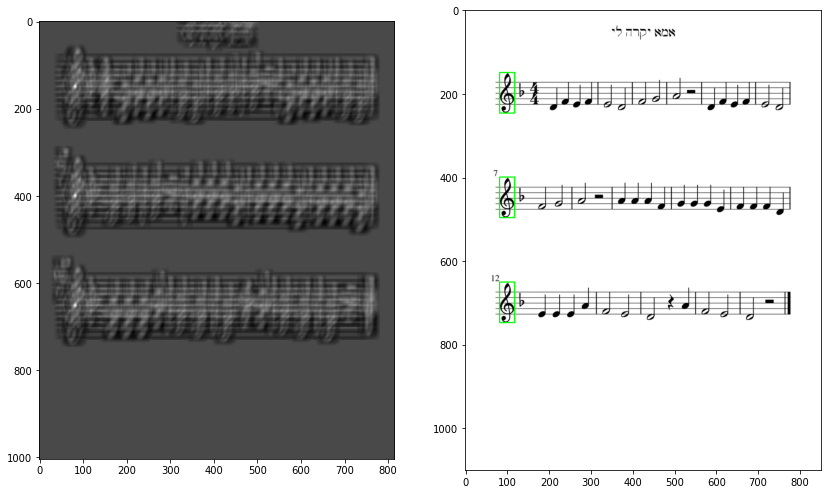

In [76]:
import sys
np.set_printoptions(threshold=sys.maxsize)

loc, res, imgCopy = matchTemplateRemake(img, clefTemplateResize, 0.45, True, True)

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(res, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(imgCopy, cmap = 'gray')

(13, 16) 10


Text(0.5, 1.0, 'Resize')

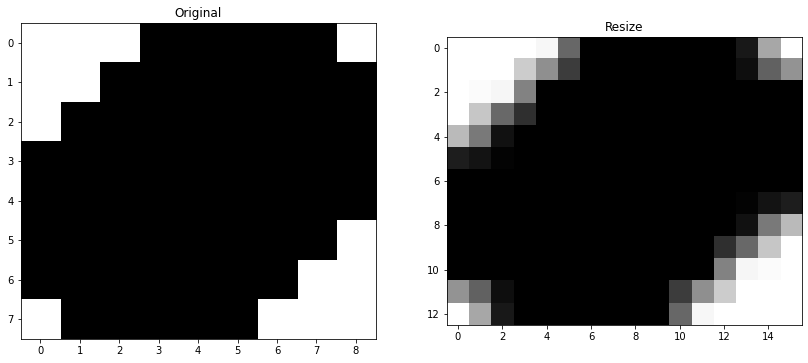

In [77]:
# blackNoteTemplate = cv2.imread(r"C:\Users\nguye\Downloads\quarter.png", cv2.IMREAD_GRAYSCALE)
# blackNoteTemplate = cv2.imread(r"C:\Users\nguye\Downloads\blackNote.png", cv2.IMREAD_GRAYSCALE)

blackNoteTemplate = np.array([
    [255, 255, 255, 0, 0, 0, 0, 0, 255],
    [255, 255, 0, 0, 0, 0, 0, 0, 0],
    [255, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 255],
    [0, 0, 0, 0, 0, 0, 0, 255, 255],
    [255, 0, 0, 0, 0, 0, 255, 255, 255],
], dtype = np.uint8) # Ratio W/H = 10/8 = 5/4

blackChosenSize, blackMaxMatched = tryTemplateMatchNote(img, blackNoteTemplate, 5/4, 0.9, avgLinesGap, error = 3)
print(blackChosenSize, blackMaxMatched)

blackTemplateSize = blackChosenSize[0]

# blackNoteTemplateResize = cv2.resize(blackNoteTemplate, (int(avgLinesGap), int(avgLinesGap)))
blackNoteTemplateResize = cv2.resize(blackNoteTemplate, (int(blackTemplateSize * (5/4)), int(blackTemplateSize)))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(blackNoteTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(blackNoteTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([174, 174, 174, 175, 175, 175, 175, 176, 176, 176, 177, 177, 177,
       177, 178, 178, 178, 179, 201, 201, 202, 202, 202, 203, 203, 203,
       204, 204, 204, 205, 205, 205, 206, 206, 208, 208, 208, 209, 209,
       209, 210, 210, 210, 211, 211, 211, 212, 212, 213, 229, 230, 230,
       230, 231, 231, 231, 232, 232, 232, 232, 233, 233, 234, 234, 242,
       242, 243, 243, 243, 244, 244, 244, 245, 245, 245, 246, 246, 246,
       247, 247, 248, 257, 257, 257, 258, 258, 258, 259, 259, 259, 260,
       260, 260, 261, 261, 261, 262, 262, 277, 278, 278, 278, 279, 279,
       279, 279, 280, 280, 280, 281, 281, 281, 282, 285, 285, 286, 286,
       286, 287, 287, 287, 288, 288, 288, 289, 289, 364, 365, 365, 366,
       366, 366, 367, 367, 367, 368, 368, 369, 369, 396, 396, 397, 397,
       398, 398, 398, 399, 399, 399, 400, 400, 427, 428, 428, 429, 429,
       429, 430, 430, 430, 431, 431, 432, 432, 459, 459, 460, 460, 460,
       461, 461, 461, 462, 462, 463, 463, 464, 506, 506

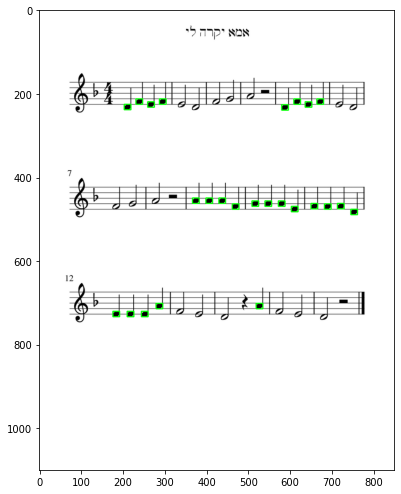

In [78]:
loc, res, imgCopy = matchTemplateRemake(img, blackNoteTemplateResize, 0.61, True, True)

plt.figure(figsize = (14, 9))
#plt.subplot(1, 2, 1); plt.imshow(res, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(imgCopy, cmap = 'gray')

In [79]:
# cv2.imwrite(r"C:\Users\nguye\Downloads\res.jpg", imgCopy)

(13, 16) 16


Text(0.5, 1.0, 'Resize')

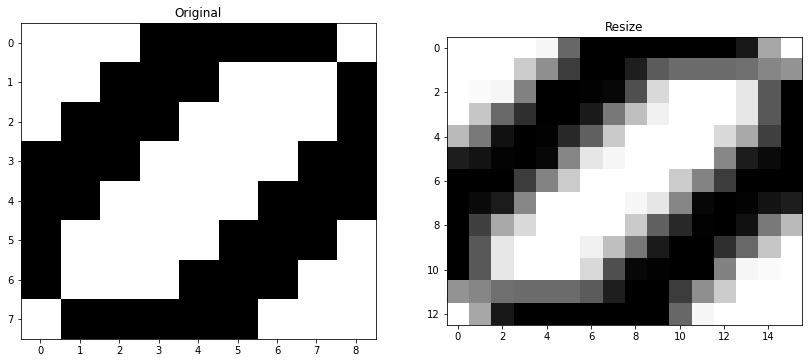

In [80]:
# whiteNoteTemplate = np.array([
#     [255, 255, 255, 0  , 0  , 0  , 0  , 0  , 255],
#     [255, 255, 0  , 0  , 255, 255, 255, 255, 0  ],
#     [255, 0  , 0  , 255, 255, 255, 255, 255, 0  ],
#     [0  , 0  , 255, 255, 255, 255, 255, 255, 0  ],
#     [0  , 255, 255, 255, 255, 255, 255, 0  , 0  ],
#     [0  , 255, 255, 255, 255, 255, 0  , 0  , 255],
#     [0  , 255, 255, 255, 255, 0  , 0  , 255, 255],
#     [255, 0  , 0  , 0  , 0  , 0  , 255, 255, 255],
# ], dtype = np.uint8) # Ratio W/H = 10/8 = 5/4

whiteNoteTemplate = np.array([
    [255, 255, 255, 0  , 0  , 0  , 0  , 0  , 255],
    [255, 255, 0  , 0  , 0  , 255, 255, 255, 0  ],
    [255, 0  , 0  , 0  , 255, 255, 255, 255, 0  ],
    [0  , 0  , 0  , 255, 255, 255, 255, 0  , 0  ],
    [0  , 0  , 255, 255, 255, 255, 0  , 0  , 0  ],
    [0  , 255, 255, 255, 255, 0  , 0  , 0  , 255],
    [0  , 255, 255, 255, 0  , 0  , 0  , 255, 255],
    [255, 0  , 0  , 0  , 0  , 0  , 255, 255, 255],
], dtype = np.uint8) # Ratio W/H = 10/8 = 5/4

whiteChosenSize, whiteMaxMatched = tryTemplateMatchNote(img, whiteNoteTemplate, 5/4, 0.7, avgLinesGap, error = 3)
print(whiteChosenSize, whiteMaxMatched)
whiteTemplateSize = whiteChosenSize[0]

# blackNoteTemplateResize = cv2.resize(blackNoteTemplate, (int(avgLinesGap), int(avgLinesGap)))
whiteNoteTemplateResize = cv2.resize(whiteNoteTemplate, (int(whiteTemplateSize * (5/4)), int(whiteTemplateSize)))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(whiteNoteTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(whiteNoteTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([175, 176, 176, 177, 177, 178, 215, 216, 216, 217, 269, 270, 271,
       271, 272, 328, 329, 330, 330, 331, 332, 332, 333, 334, 365, 366,
       366, 367, 367, 368, 373, 373, 374, 375, 376, 414, 415, 416, 417,
       434, 435, 435, 436, 447, 448, 448, 449, 450, 496, 497, 497, 498,
       565, 566, 567, 567, 610, 610, 611, 612, 613, 671, 672, 672, 673,
       708, 709, 710, 741, 742, 742, 743, 744], dtype=int64), array([464, 463, 464, 462, 463, 462, 457, 456, 457, 456, 451, 450, 449,
       450, 449, 715, 714, 713, 714, 220, 219, 220, 219, 219, 227, 226,
       227, 225, 226, 225, 721, 722, 721, 720, 720, 214, 213, 212, 212,
       728, 727, 728, 727, 207, 206, 207, 206, 205, 200, 199, 200, 199,
       715, 714, 713, 714, 721, 722, 721, 720, 720, 728, 727, 728, 727,
       220, 219, 219, 227, 226, 227, 226, 225], dtype=int64)) (73,)
After: (array([176, 216, 270, 329, 332, 366, 374, 415, 435, 448, 497, 566, 611,
       672, 709, 742], dtype=int64), array([463, 456, 449, 71

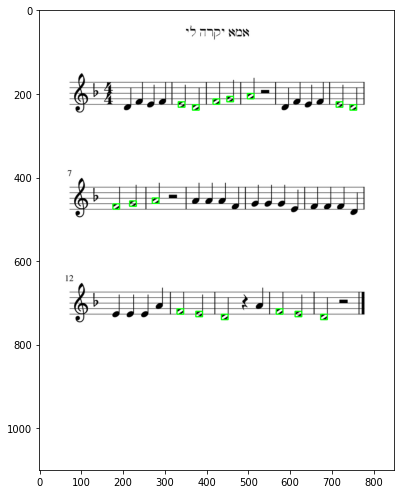

In [81]:
loc, res, imgCopy = matchTemplateRemake(img, whiteNoteTemplateResize, 0.68, True, True)

plt.figure(figsize = (14, 9))
#plt.subplot(1, 2, 1); plt.imshow(res, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(imgCopy, cmap = 'gray')

(10, 16) 0


Text(0.5, 1.0, 'Resize')

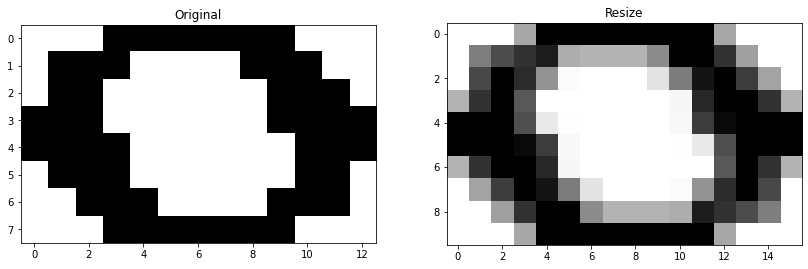

In [82]:
whiteAloneNoteTemplate = np.array([
    [255, 255, 255, 0  , 0  , 0  , 0  , 0  , 0  , 0  , 255, 255, 255],
    [255, 0  , 0  , 0  , 255, 255, 255, 255, 0  , 0  , 0  , 255, 255],
    [255, 0  , 0  , 255, 255, 255, 255, 255, 255, 0  , 0  , 0  , 255],
    [0  , 0  , 0  , 255, 255, 255, 255, 255, 255, 0  , 0  , 0  , 0  ],
    [0  , 0  , 0  , 0  , 255, 255, 255, 255, 255, 255, 0  , 0  , 0  ],
    [255, 0  , 0  , 0  , 255, 255, 255, 255, 255, 255, 0  , 0  , 255],
    [255, 255, 0  , 0  , 0  , 255, 255, 255, 255, 0  , 0  , 0  , 255],
    [255, 255, 255, 0  , 0  , 0  , 0  , 0  , 0  , 0  , 255, 255, 255],
], dtype = np.uint8) # Ratio W/H = 13/8

whiteAloneChosenSize, whiteAloneMaxMatched = tryTemplateMatchNote(img, whiteAloneNoteTemplate, 13/8, 0.7, avgLinesGap, error = 3)
print(whiteAloneChosenSize, whiteAloneMaxMatched)
whiteAloneTemplateSize = whiteAloneChosenSize[0]

whiteAloneNoteTemplateResize = cv2.resize(whiteAloneNoteTemplate, (int(whiteAloneTemplateSize * (13/8)), int(whiteAloneTemplateSize)))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(whiteAloneNoteTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(whiteAloneNoteTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([], dtype=float64), array([], dtype=float64)) (0,)
After: (array([], dtype=float64), array([], dtype=float64)) (0,)


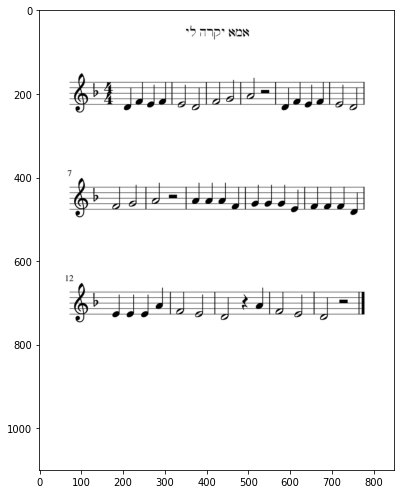

In [83]:
loc, res, imgCopy = matchTemplateRemake(img, whiteAloneNoteTemplateResize, 0.7, True, True)

plt.figure(figsize = (14, 9))
#plt.subplot(1, 2, 1); plt.imshow(res, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(imgCopy, cmap = 'gray')

56


Text(0.5, 1.0, 'Resize')

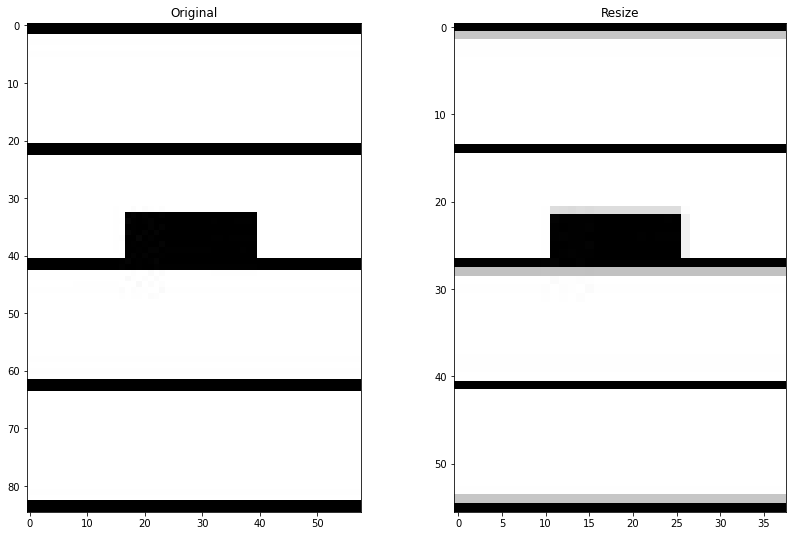

In [84]:
halfRestTemplate = cv2.imread(r"C:\Users\nguye\Downloads\half_rest_1.jpg", cv2.IMREAD_GRAYSCALE) # Ratio W/H = 58/85

halfRestChosenSize = int(int(avgLinesGap) + 1)*4
print(halfRestChosenSize)
halfRestTemplateSize = halfRestChosenSize

halfRestTemplateResize = cv2.resize(halfRestTemplate, (int(halfRestTemplateSize * (58/85)), int(halfRestTemplateSize)))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(halfRestTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(halfRestTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([299, 300, 301, 302, 303, 519, 520, 521, 522, 523, 524, 705, 706,
       707, 708, 709, 710, 711, 712], dtype=int64), array([422, 422, 422, 422, 422, 171, 171, 171, 171, 171, 171, 673, 673,
       673, 673, 673, 673, 673, 673], dtype=int64)) (19,)
After: (array([301, 521, 708], dtype=int64), array([422, 171, 673], dtype=int64)) (3,)


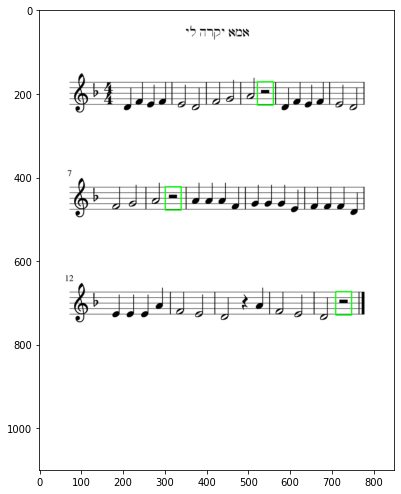

In [86]:
loc, res, imgCopy = matchTemplateRemake(img, halfRestTemplateResize, 0.6, True, True)

plt.figure(figsize = (14, 9))
#plt.subplot(1, 2, 1); plt.imshow(res, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(imgCopy, cmap = 'gray')